# LSTM_MODEL

### LSTM Model for Kaggle's Toxic Comments Challenge: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

### The purpose is to build a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate

In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from rake_nltk import Rake
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import data_loader
from sklearn.metrics import roc_curve,auc,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from pandas import Series
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier

In [2]:
#Loading data
#Loading data
train_df, valid_df = data_loader.load_train_data("train.csv", valid_rate=0.0,is_df=True)
test_df = data_loader.load_test_data("test.csv","test_labels.csv", is_df=True)

temp = train_df
# Data Exploration 

#data shape
print("Data shape")
print(train_df.shape)
print(valid_df.shape)

#data type
print()
print("Data types")
print(train_df.dtypes)

#sample data
print()
print("Sample training data")
print(train_df.iloc[[11]])

print(test_df.shape)


Data shape
(159571, 8)
(0, 8)

Data types
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

Sample training data
                   id                                       comment_text  \
309  00c49503b35bb572  CU and Scibaby \nWhy are you wasting time CUin...   

     toxic  severe_toxic  obscene  threat  insult  identity_hate  
309      0             0        0       0       0              0  
(63978, 8)


In [3]:
print(len(train_df))
print(temp)

159571
                      id                                       comment_text  \
130060  b7bf5a6846bd456a  "\n Oppose. WP:MOSTM, the guideline covering t...   
132921  c70efd55724be549            === I AM GLEN AND I LOVE BEING A FAG===   
46589   7c7f688f129e511e  "\n\nIf it happens it may be worth noting but ...   
129843  b68d08319e5fcb14        }}\n{{WikiProject Elections and Referendums   
2528    06bf9f58011ca46a  "\n\nI posted a thread about Donny on WP:ANI  ...   
18364   3076d82df3da28bf  "\nI am very sorry that I came across as being...   
56718   978dca9521f3422c  Faerie's Aire and Death Waltz \n\nHi. Just tho...   
156068  c88fe65152e226e4  Wrestlemania \n\nIt was not a test. In my view...   
56041   95bf7672a11f2799  Risk factors\n\nThe role of chlamydia should b...   
90055   f0f3d0b835e0caae  Re your reversion of the removal of the websit...   
117786  753a4b62241d8108  "::Hey Andrew,\nForgot to mention another thin...   
309     00c49503b35bb572  CU and Scibaby \nWh

In [4]:

train_len = len(train_df)
print(train_len)
train_df = pd.concat(objs=[train_df, test_df],axis=0).reset_index(drop=True)


159571


In [5]:

print(train_len)

print(temp.shape)


159571
(159571, 8)


In [6]:
print(train_df['comment_text'].iloc[10])

"::Hey Andrew,
Forgot to mention another thing; the main image on the points of sail would be  Image:Points of sail for single sail, double masted sailboats .I recently went over the sailing for dummies book again and here, 2 masts with sails are shown for the schematic, this is more accurate (most common sailboats have only but 1 mast but 2 sails which work like a 2 masted sailboat with 1 sail per mast. In a schematic it is best to simply draw 2 masts with 1 sail. The reason why this is done (besides being just more accurate) is also because it makes a noticable difference at 180° to the wind (running); here sails are placed ""goosewinged"", so the efficiency and method is similar to a square rigged ship at this coarse. With a image you have now (1 sail, 1 mast) this isn't possible and so the image if faulty in a way. This is btw also the reason why I myself got a little confused at first on this. I mentioned before that you could make a square rigged sailboat points of sail; with thi

In [7]:
#Data Cleaning
#1. Remove all punctuation marks 
#2. Remove all stop words
#3. Convert everything to lowercase
#4. Tokenize
#5. Stem and Lemmatize
#6. Limit the length of the comments
#7. Remove rare words


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


train_df['charCount']= train_df['comment_text'].str.len()
#train_df[['comment_text','charCount']].head()


stop = stopwords.words('english')


#convert to lowercase
                                        
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_df['comment_text'].head()

test_df['comment_text'] = test_df['comment_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['comment_text'].head()

#removing punctuation

train_df['comment_text'] = train_df['comment_text'].str.replace('[^\w\s]','')
train_df['comment_text'].head()

#removing stopwords

train_df['comment_text'] = train_df['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train_df['comment_text'].head()


0    oppose wpmostm guideline covering trademarks b...
1                                        glen love fag
2    happens may worth noting present view like adv...
3                    wikiproject elections referendums
4    posted thread donny wpani saturday 1 accused w...
Name: comment_text, dtype: object

In [8]:

import nltk

train_df['comment_text']= train_df.comment_text.astype(str)
train_df.comment_text.dtypes

dtype('O')

In [9]:
#tokenizing the words
from textblob import TextBlob 
train_df['comment_text']=train_df['comment_text'].apply(lambda x: TextBlob(x).words)


In [10]:
train_df['comment_text'].head()

0    [oppose, wpmostm, guideline, covering, tradema...
1                                    [glen, love, fag]
2    [happens, may, worth, noting, present, view, l...
3                [wikiproject, elections, referendums]
4    [posted, thread, donny, wpani, saturday, 1, ac...
Name: comment_text, dtype: object

In [11]:
#import nltk
#nltk.download("popular")

In [12]:
#Stemming and Lemmatizing
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import Word

st=PorterStemmer()

train_df['comment_text']=train_df['comment_text'].apply(lambda x: " ".join([st.stem(word) for word in str(x).split()]))
train_df['comment_text']= train_df['comment_text'].apply(lambda x: " ".join([WordNetLemmatizer().lemmatize(word,pos="v") for word in str(x).split()]))


In [13]:
print(train_df['comment_text'].iloc[10])

['hey', 'andrew', 'forgot', 'mention', 'another', 'thing', 'main', 'image', 'points', 'sail', 'would', 'imagepoints', 'sail', 'single', 'sail', 'double', 'masted', 'sailboats', 'recently', 'went', 'sailing', 'dummies', 'book', '2', 'masts', 'sails', 'shown', 'schematic', 'accurate', 'common', 'sailboats', '1', 'mast', '2', 'sails', 'work', 'like', '2', 'masted', 'sailboat', '1', 'sail', 'per', 'mast', 'schematic', 'best', 'simply', 'draw', '2', 'masts', '1', 'sail', 'reason', 'done', 'besides', 'accurate', 'also', 'makes', 'noticable', 'difference', '180', 'wind', 'running', 'sails', 'placed', 'goosewinged', 'efficiency', 'method', 'similar', 'square', 'rigged', 'ship', 'coarse', 'image', '1', 'sail', '1', 'mast', 'isnt', 'possible', 'image', 'faulty', 'way', 'btw', 'also', 'reason', 'got', 'little', 'confused', 'first', 'mentioned', 'could', 'make', 'square', 'rigged', 'sailboat', 'points', 'sail', 'suggestion', 'would', 'required', 'instead', 'could', 'best', 'make', 'image', 'first'

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model

import numpy as np
import pandas as pd
from pandas import Series
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import roc_curve,auc,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [15]:
print(train_len)

159571


In [25]:
y_test_temp = train_df[train_len:]
print(y_test_temp.shape)
print(y_test_temp)


(63978, 9)
                      id                                       comment_text  \
159571  0001ea8717f6de06  ['thank', 'understanding', 'think', 'highly', ...   
159572  000247e83dcc1211                ['dear', 'god', 'site', 'horrible']   
159573  0002f87b16116a7f  ['somebody', 'invariably', 'try', 'add', 'reli...   
159574  0003e1cccfd5a40a  ['says', 'right', 'type', 'type', 'institution...   
159575  00059ace3e3e9a53  ['adding', 'new', 'product', 'list', 'make', '...   
159576  000663aff0fffc80                                    ['one', '1897']   
159577  000689dd34e20979  ['reason', 'banning', 'throwing', 'article', '...   
159578  000844b52dee5f3f                ['blocked', 'editing', 'wikipedia']   
159579  00091c35fa9d0465  ['arabs', 'committing', 'genocide', 'iraq', 'p...   
159580  000968ce11f5ee34  ['please', 'stop', 'continue', 'vandalize', 'w...   
159581  0009734200a85047  ['energy', 'edited', 'introduction', 'previous...   
159582  000a02d807ae0254  ['redslash', 'c

In [16]:

import tensorflow as tf
from keras import backend as K
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train_sentences = train_df['comment_text']

embed_size = 128 
max_features = 20000 
maxlen = 200 

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sentences))
tokenized_train = tokenizer.texts_to_sequences(train_sentences)


docs_combined= pad_sequences(tokenized_train, maxlen=maxlen)
df_train_padded= docs_combined[:train_len]
print(len(df_train_padded))
df_test_padded= docs_combined[train_len:]
print(len(df_test_padded))

X_t = df_train_padded
Y = train_df[:train_len][classes].values


X_test = df_test_padded



test_pred = pd.DataFrame.from_dict({'id': test_df['id']})


inp = Input(shape=(200,)) 
x = Embedding(max_features, embed_size)(inp)
output_size = 60 
x = LSTM(output_size, return_sequences=True, name='LSTM_Layer')(x)
x = GlobalMaxPool1D()(x)
percent_drop = 0.10
x = Dropout(percent_drop)(x)
dense_size = 25
x = Dense(dense_size, activation="relu")(x)
x = Dropout(percent_drop)(x)
x = Dense(6, activation="sigmoid")(x)


model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    

159571
63978


In [17]:
model.fit(X_t,Y, batch_size=32, epochs=2, validation_split=0.1)


Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 842s 6ms/step - loss: 0.1095 - acc: 0.9660 - val_loss: 0.0578 - val_acc: 0.9800
Epoch 2/2
143613/143613 [==============================] - 852s 6ms/step - loss: 0.0535 - acc: 0.9810 - val_loss: 0.0526 - val_acc: 0.9810


In [28]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_test_temp = y_test_temp[classes]
print(y_test_temp)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
159571      0             0        0       0       0              0
159572      0             0        0       0       0              0
159573      0             0        0       0       0              0
159574      0             0        0       0       0              0
159575      0             0        0       0       0              0
159576      0             0        0       0       0              0
159577      0             0        0       0       0              0
159578      0             0        0       0       0              0
159579      1             0        0       0       0              0
159580      0             0        0       0       0              0
159581      0             0        0       0       0              0
159582      0             0        0       0       0              0
159583      0             0        0       0       0              0
159584      0             0        0       0    

In [29]:
x= model.predict(X_test)


Text(0.5, 1.0, 'LSTM | Mean AUC = 0.961956')

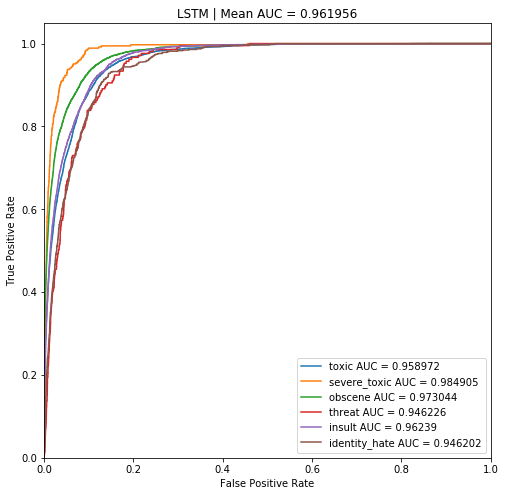

In [31]:
plt.figure(0,figsize=(8,8)).clf()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
avg_auc = 0
for i,class_ in enumerate(classes):
    actual = y_test_temp[class_]
    fpr, tpr, threshold = roc_curve(actual, x[:,i])
    AUC = np.round(roc_auc_score(actual,x[:,i]),6)
    avg_auc = avg_auc + AUC
    plt.plot(fpr,tpr,label=class_+" AUC = "+str(AUC))
    plt.legend(loc="lower right")
    
plt.title('LSTM | Mean AUC = {}'.format(np.round(float(avg_auc)/6.0,6)))

In [20]:
pred = pd.DataFrame.from_dict({'id': test_df['id']})



In [48]:
x = pd.DataFrame(x)
x.insert(loc=0,column='id', value=pred['id']) 


In [51]:
x.columns=['id','toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(x)

                     id     toxic  severe_toxic   obscene        threat  \
0                   NaN  0.004378  3.914825e-06  0.000986  2.285802e-06   
1                   NaN  0.115423  2.476405e-03  0.040654  6.443863e-04   
2                   NaN  0.048482  5.049652e-05  0.007070  1.890738e-05   
3                   NaN  0.020789  2.383686e-05  0.004218  9.872775e-06   
4                   NaN  0.011696  1.274122e-05  0.002645  5.112252e-06   
5      0001ea8717f6de06  0.098052  3.702527e-03  0.042887  1.599456e-03   
6                   NaN  0.003336  1.213470e-06  0.000637  3.281310e-07   
7      000247e83dcc1211  0.167378  5.790499e-03  0.068217  1.937255e-03   
8                   NaN  0.030834  4.690778e-04  0.010218  4.137028e-04   
9                   NaN  0.013027  2.055487e-05  0.002831  6.008197e-06   
10                  NaN  0.047522  3.548520e-04  0.014751  1.894114e-04   
11     0002f87b16116a7f  0.022911  7.904927e-05  0.007340  2.743726e-05   
12                  NaN  

In [52]:
x.to_csv('submission.csv', index=False)
z= pd.read_csv('submission.csv')
z

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,NaN,0.004378,3.914825e-06,0.000986,2.285802e-06,0.000641,0.000046
1,NaN,0.115423,2.476405e-03,0.040654,6.443863e-04,0.043057,0.003269
2,NaN,0.048482,5.049652e-05,0.007070,1.890738e-05,0.008629,0.000322
3,NaN,0.020789,2.383686e-05,0.004218,9.872775e-06,0.003672,0.000192
4,NaN,0.011696,1.274122e-05,0.002645,5.112251e-06,0.002076,0.000099
5,0001ea8717f6de06,0.098052,3.702527e-03,0.042887,1.599456e-03,0.040397,0.006449
6,NaN,0.003336,1.213470e-06,0.000637,3.281310e-07,0.000429,0.000011
7,000247e83dcc1211,0.167378,5.790499e-03,0.068217,1.937255e-03,0.073968,0.008485
8,NaN,0.030834,4.690778e-04,0.010218,4.137028e-04,0.009069,0.002168
9,NaN,0.013027,2.055488e-05,0.002831,6.008197e-06,0.002514,0.000094
